# No interaction

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load and prepare the data
covid_data = pd.read_csv('TX_death2021.csv')
gdp_data = pd.read_csv('TX_GDP2021.csv')
income_data = pd.read_csv('TX_income2021.csv')

# Merge the data into one DataFrame
data = covid_data.merge(gdp_data, on='FIPS').merge(income_data, on='FIPS')

# Rename columns for clarity
data = data.rename(columns={'Deaths': 'deaths', 'GDP': 'gdp', 'Income': 'income'})

# Define the independent variables
X = data[['gdp', 'income']]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = data['deaths']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     582.3
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           8.20e-95
Time:                        23:27:47   Log-Likelihood:                -3278.3
No. Observations:                 253   AIC:                             6563.
Df Residuals:                     250   BIC:                             6573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.368e+05   2.56e+04      5.333      0.0

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     582.3
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           8.20e-95
Time:                        23:47:29   Log-Likelihood:                -3278.3
No. Observations:                 253   AIC:                             6563.
Df Residuals:                     250   BIC:                             6573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.368e+05   2.56e+04      5.333      0.0

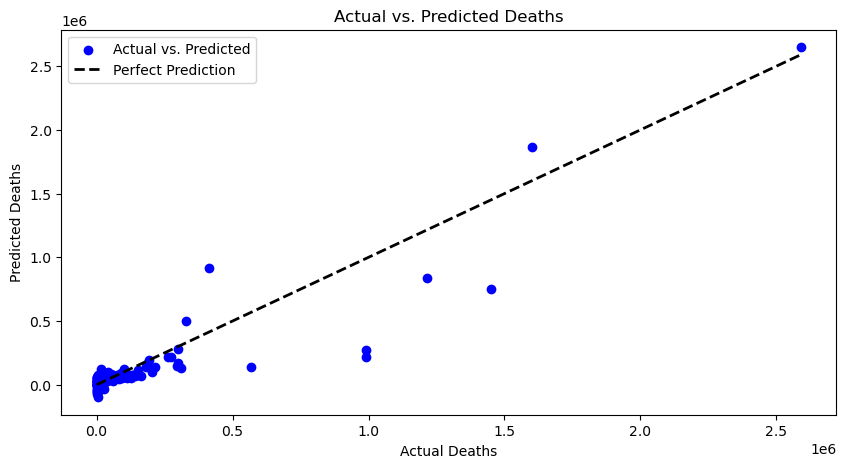

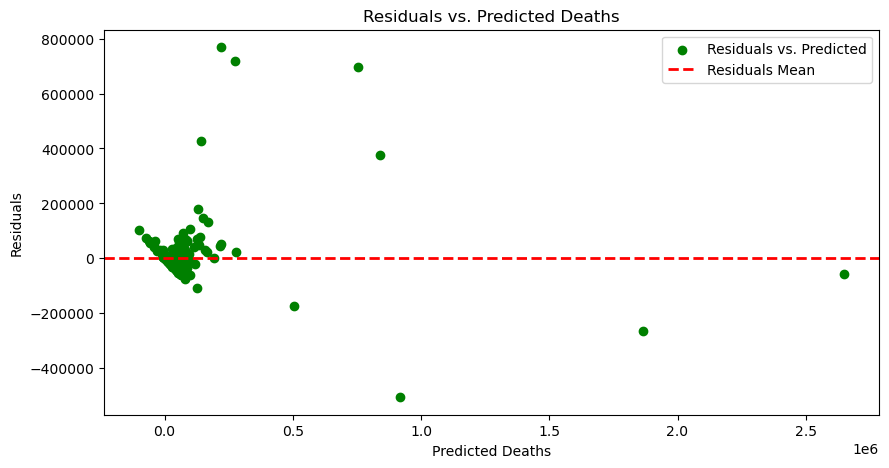

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare the data
covid_data = pd.read_csv('TX_death2021.csv')
gdp_data = pd.read_csv('TX_GDP2021.csv')
income_data = pd.read_csv('TX_income2021.csv')

# Merge the data into one DataFrame
data = covid_data.merge(gdp_data, on='FIPS').merge(income_data, on='FIPS')

# Rename columns for clarity
data = data.rename(columns={'Deaths': 'deaths', 'GDP': 'gdp', 'Income': 'income'})

# Define the independent variables
X = data[['gdp', 'income']]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = data['deaths']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualize the results
plt.figure(figsize=(10, 5))

# Plot the actual vs. predicted values
plt.scatter(y, model.fittedvalues, label='Actual vs. Predicted', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.legend()
plt.title('Actual vs. Predicted Deaths')

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(model.fittedvalues, model.resid, color='green', label='Residuals vs. Predicted')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Residuals Mean')
plt.xlabel('Predicted Deaths')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals vs. Predicted Deaths')

plt.show()


# Interaction

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load and prepare the data
covid_data = pd.read_csv('TX_death2021.csv')
gdp_data = pd.read_csv('TX_GDP2021.csv')
income_data = pd.read_csv('TX_income2021.csv')

# Merge the data into one DataFrame
data = covid_data.merge(gdp_data, on='FIPS').merge(income_data, on='FIPS')

# Rename columns for clarity
data = data.rename(columns={'Deaths': 'deaths', 'GDP': 'gdp', 'Income': 'income'})

# Create interaction terms
data['gdp_income_interaction'] = data['gdp'] * data['income']

# Define the independent variables including the interaction term
X = data[['gdp', 'income', 'gdp_income_interaction']]

# Add a constant term to thae model
X = sm.add_constant(X)

# Define the dependent variable
y = data['deaths']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     882.5
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.56e-132
Time:                        23:28:21   Log-Likelihood:                -3187.2
No. Observations:                 253   AIC:                             6382.
Df Residuals:                     249   BIC:                             6397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.30

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     882.5
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.56e-132
Time:                        23:49:02   Log-Likelihood:                -3187.2
No. Observations:                 253   AIC:                             6382.
Df Residuals:                     249   BIC:                             6397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.30

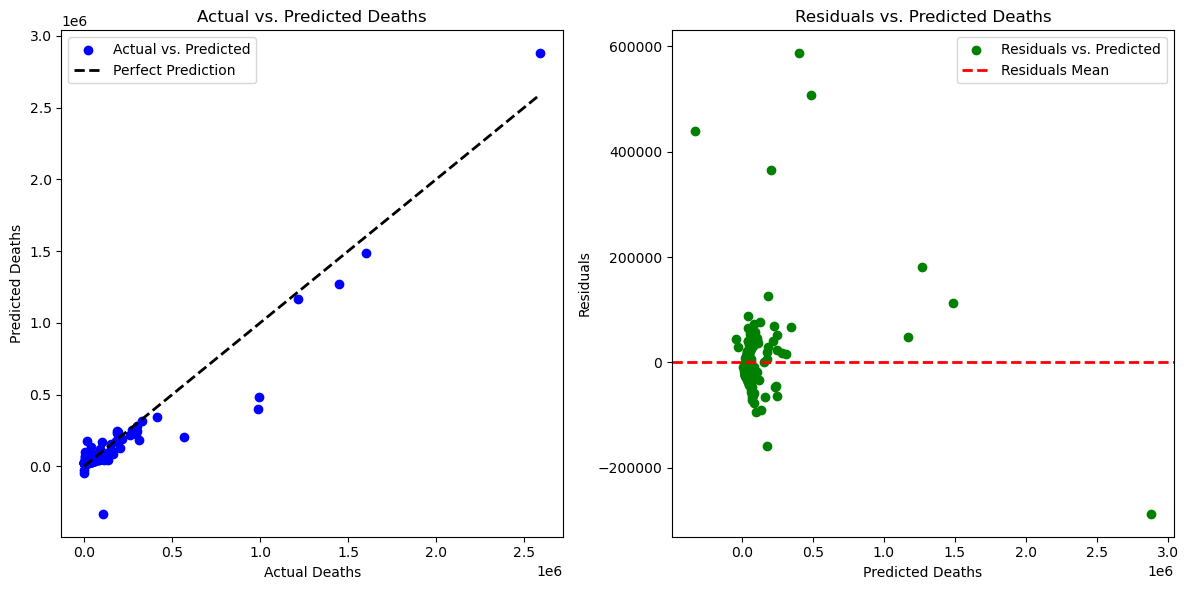

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare the data
covid_data = pd.read_csv('TX_death2021.csv')
gdp_data = pd.read_csv('TX_GDP2021.csv')
income_data = pd.read_csv('TX_income2021.csv')

# Merge the data into one DataFrame
data = covid_data.merge(gdp_data, on='FIPS').merge(income_data, on='FIPS')

# Rename columns for clarity
data = data.rename(columns={'Deaths': 'deaths', 'GDP': 'gdp', 'Income': 'income'})

# Create interaction terms
data['gdp_income_interaction'] = data['gdp'] * data['income']

# Define the independent variables including the interaction term
X = data[['gdp', 'income', 'gdp_income_interaction']]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = data['deaths']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot the actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y, model.fittedvalues, label='Actual vs. Predicted', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.legend()
plt.title('Actual vs. Predicted Deaths')

# Plot residuals vs. predicted values
plt.subplot(1, 2, 2)
plt.scatter(model.fittedvalues, model.resid, color='green', label='Residuals vs. Predicted')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Residuals Mean')
plt.xlabel('Predicted Deaths')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals vs. Predicted Deaths')

plt.tight_layout()
plt.show()
